In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import wave
import pylab
from pathlib import Path
from scipy import signal
from scipy.io import wavfile
from sklearn.metrics import confusion_matrix
import itertools

# Set paths to input and output data
INPUT_HC = 'ReadText/HC'
INPUT_PD = 'ReadText/PD'

OUTPUT_DIR = r'C:\Users\mahmoud\Downloads\audio-images'

# Print names of 10 WAV files from the input path
parent_list_HC = os.listdir(INPUT_HC)
for i in range(10):
    print(parent_list_HC[i])
# Print names of 10 WAV files from the input path
parent_list_PD = os.listdir(INPUT_PD)
for i in range(10):
    print(parent_list_PD[i])

ID00_hc_0_0_0.wav
ID00_hc_0_0_0_16bit.wav
ID01_hc_0_0_0.wav
ID03_hc_0_0_0.wav
ID05_hc_0_0_0.wav
ID08_hc_0_0_0.wav
ID09_hc_0_0_0.wav
ID10_hc_0_0_0.wav
ID11_hc_0_0_0.wav
ID12_hc_0_0_0.wav
ID02_pd_2_0_0.wav
ID02_pd_2_0_0_16bit.wav
ID04_pd_2_0_1.wav
ID06_pd_3_1_1.wav
ID07_pd_2_0_0.wav
ID13_pd_3_2_2.wav
ID16_pd_2_0_0.wav
ID17_pd_2_1_0.wav
ID18_pd_4_3_3.wav
ID20_pd_3_0_1.wav


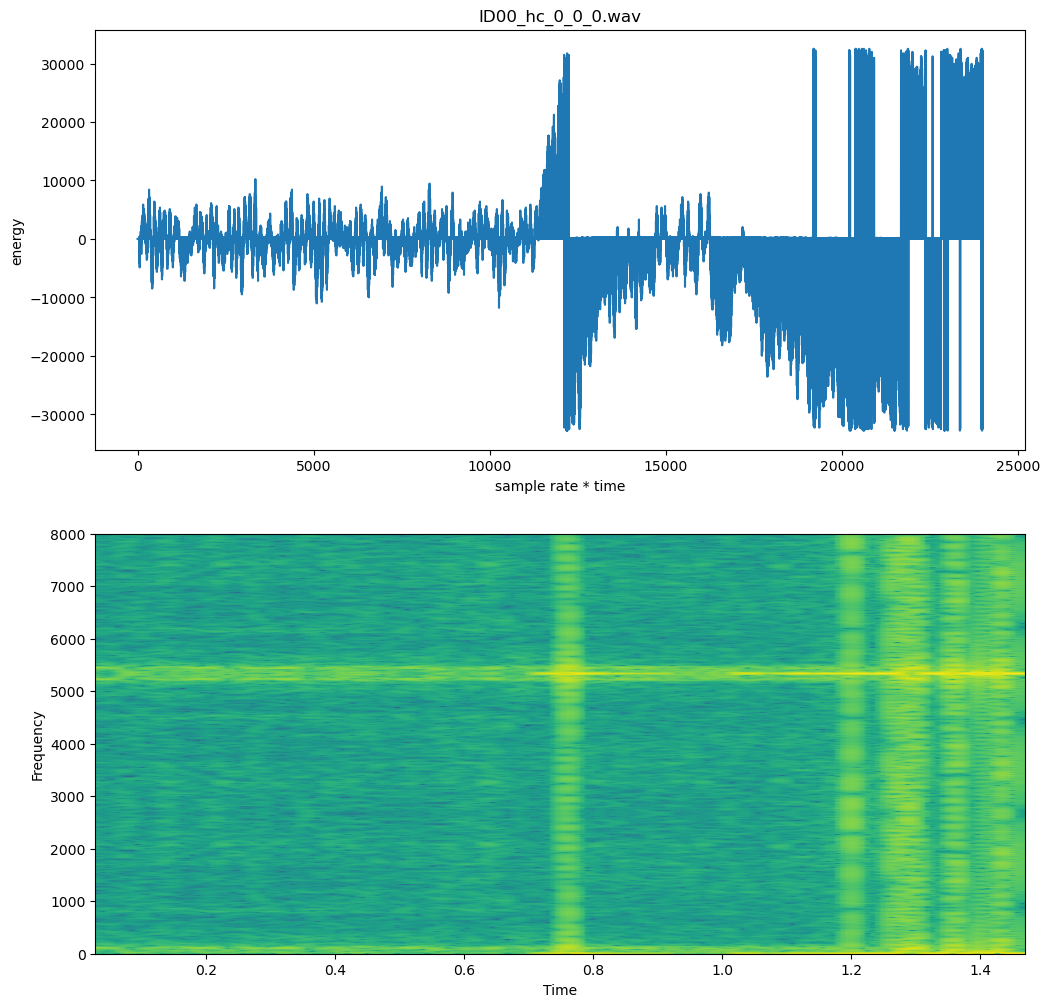

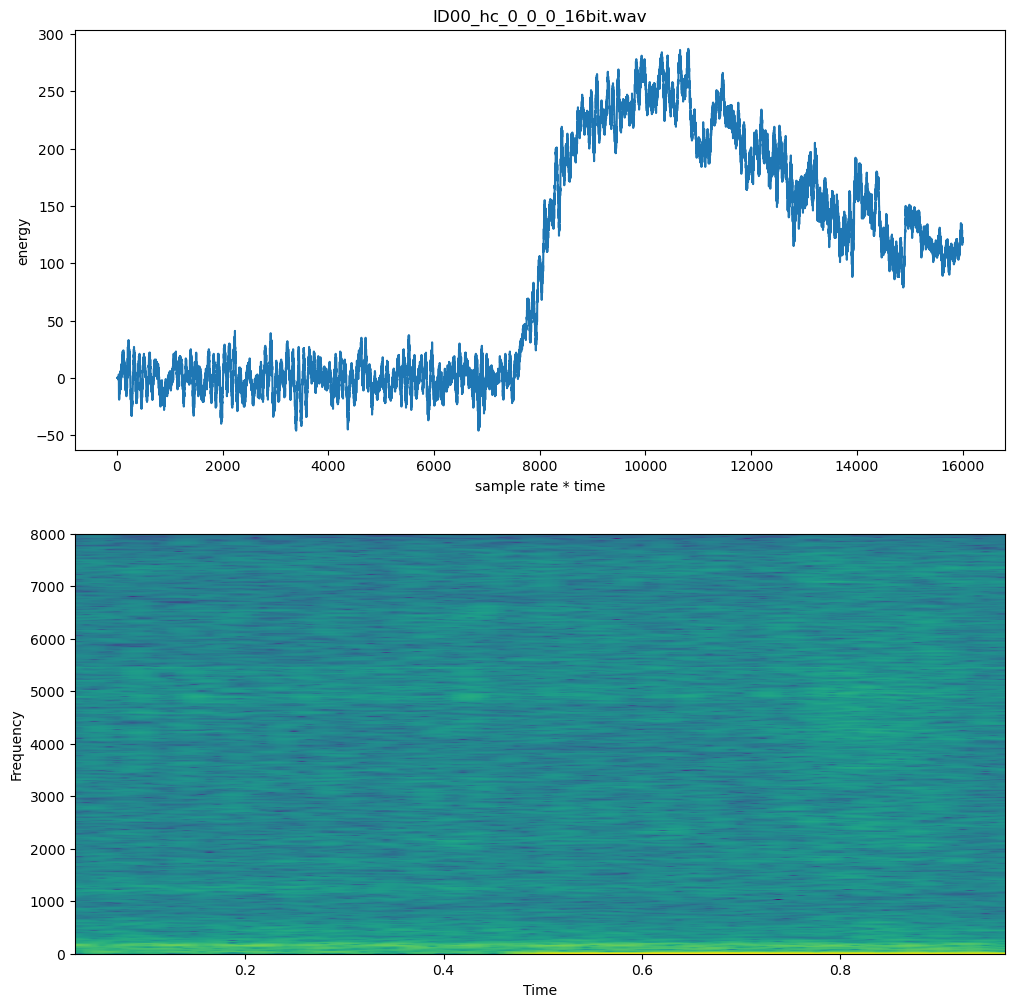

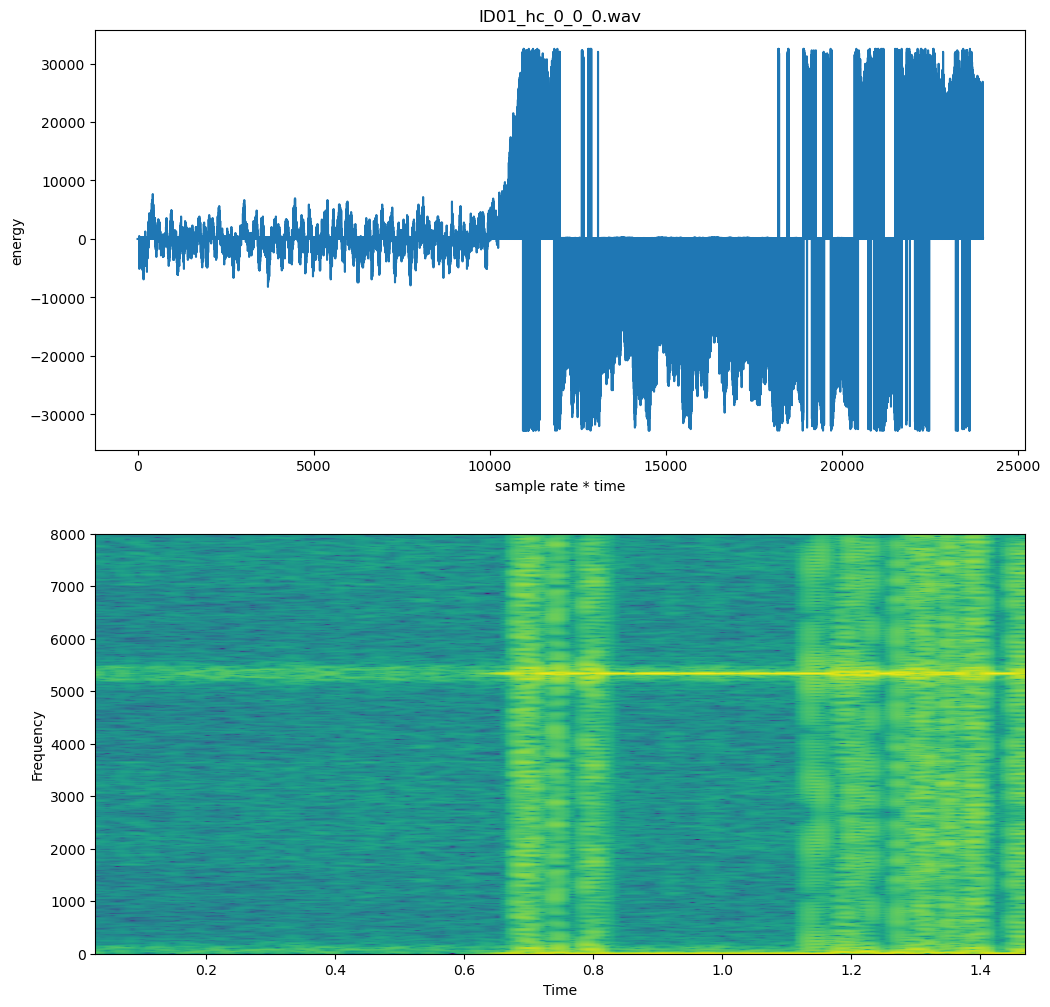

In [2]:
# Plot first 5 WAV files as a waveform and a frequency spectrum
for i in range(3): 
    signal_wave = wave.open(os.path.join(INPUT_HC, parent_list_HC[i]), 'r')
    sample_rate = 16000
    sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)

    plt.figure(figsize=(12,12))
    plot_a = plt.subplot(211)
    plot_a.set_title(parent_list_HC[i])
    plot_a.plot(sig)
    plot_a.set_xlabel('sample rate * time')
    plot_a.set_ylabel('energy')

    plot_b = plt.subplot(212)
    plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
    plot_b.set_xlabel('Time')
    plot_b.set_ylabel('Frequency')

plt.show()

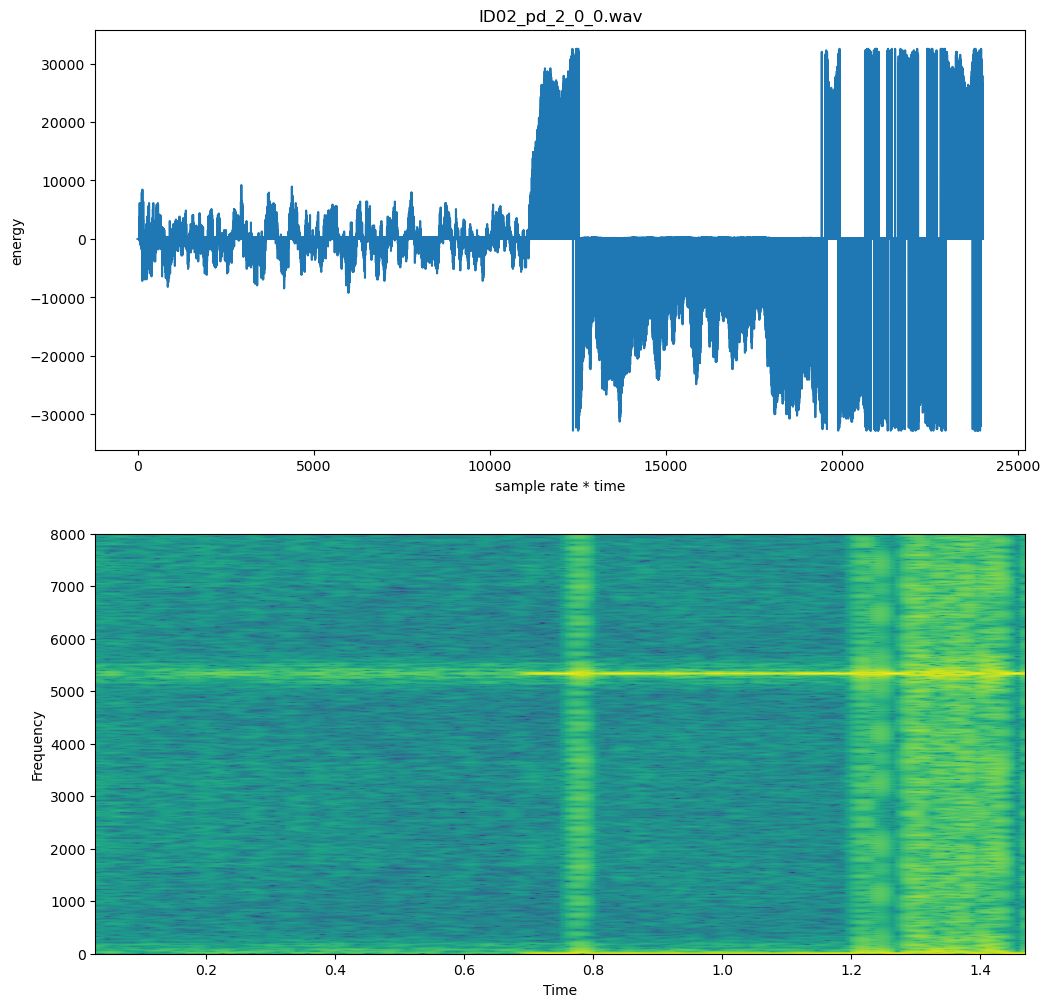

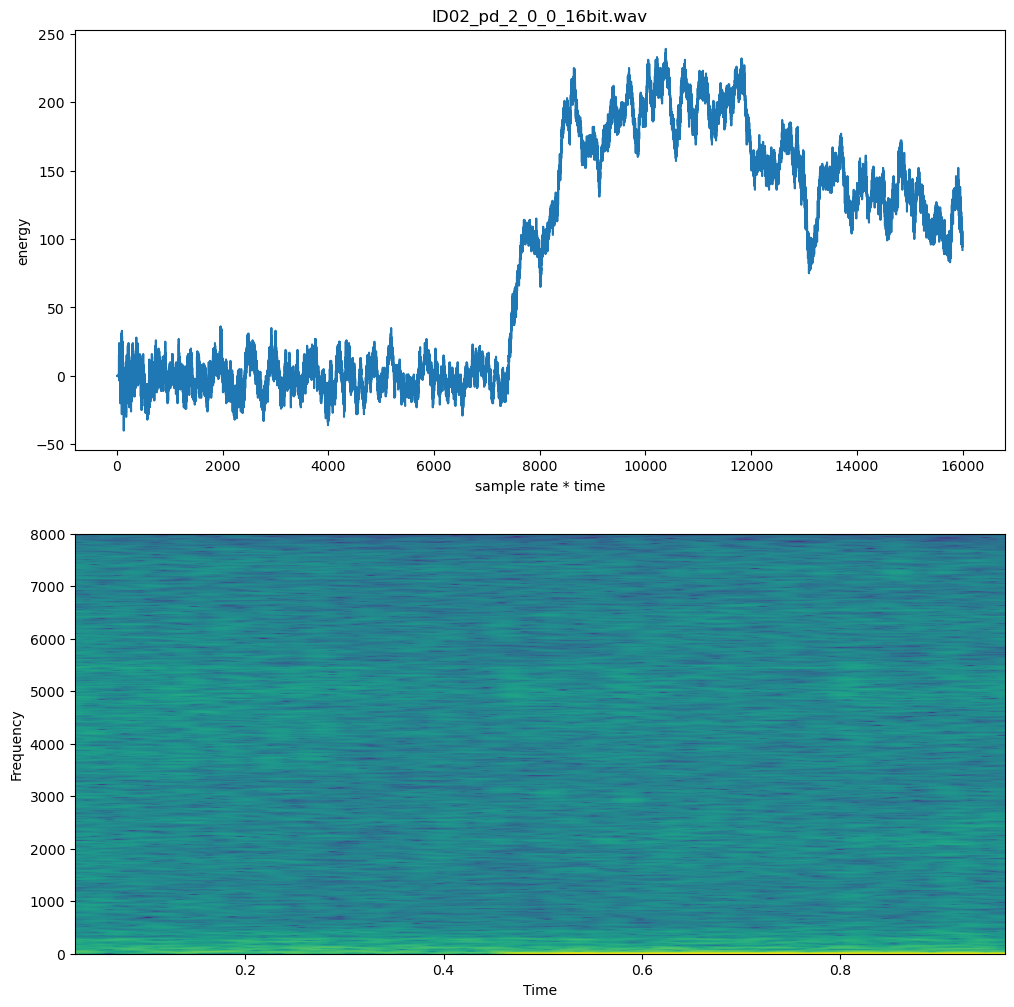

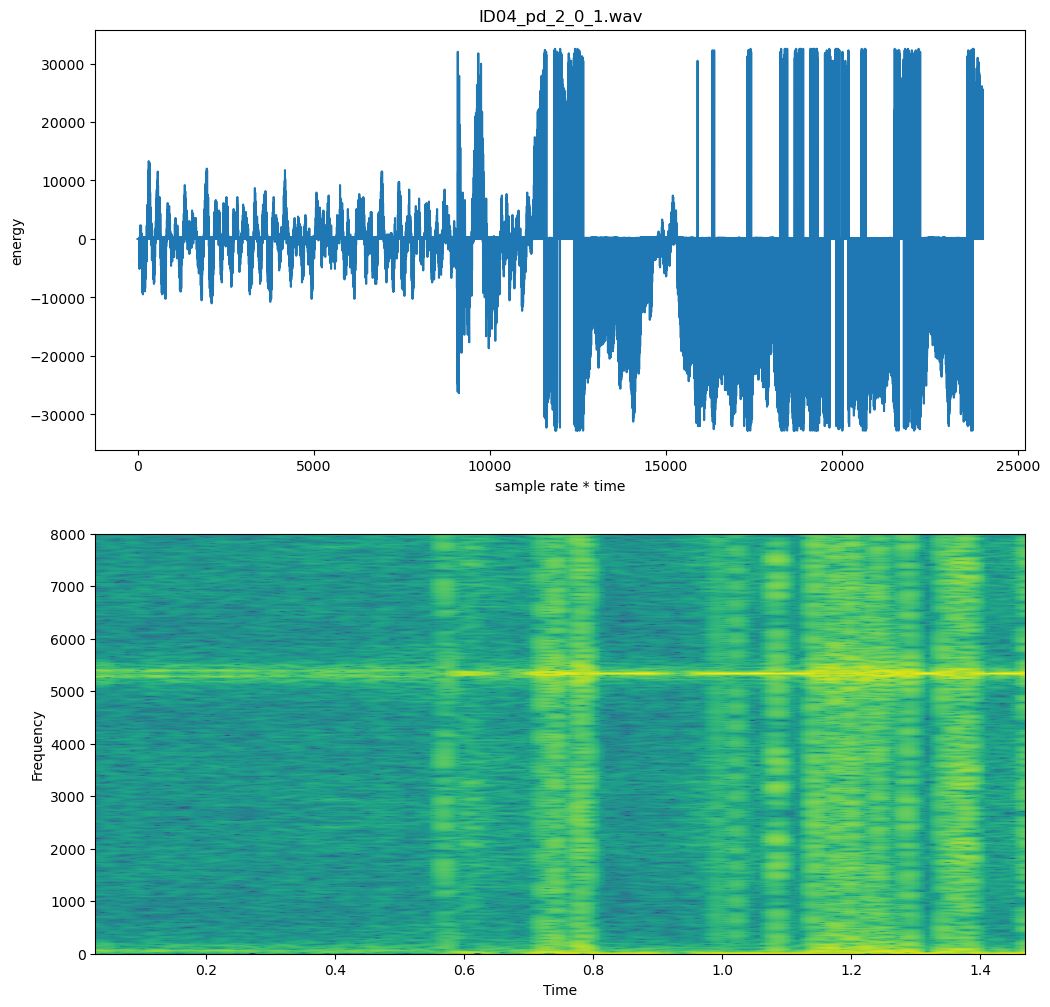

In [3]:
# Plot first 5 WAV files as a waveform and a frequency spectrum
for i in range(3): 
    signal_wave = wave.open(os.path.join(INPUT_PD, parent_list_PD[i]), 'r')
    sample_rate = 16000
    sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)

    plt.figure(figsize=(12,12))
    plot_a = plt.subplot(211)
    plot_a.set_title(parent_list_PD[i])
    plot_a.plot(sig)
    plot_a.set_xlabel('sample rate * time')
    plot_a.set_ylabel('energy')

    plot_b = plt.subplot(212)
    plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
    plot_b.set_xlabel('Time')
    plot_b.set_ylabel('Frequency')

plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import wave
import pylab
from pathlib import Path

from scipy.io import wavfile

def get_wav_info(wav_file):
    sample_rate, sound_info = wavfile.read(wav_file)
    return sound_info, sample_rate




# Set paths to input and output data
INPUT_HC = 'ReadText/HC'
INPUT_PD = 'ReadText/PD'
OUTPUT_DIR = r'C:\Users\mahmoud\Downloads\audio-images'  # Output directory for spectrograms



In [5]:
# Create directory for audio images if not exist
output_audio_images_dir = os.path.join(OUTPUT_DIR, 'audio-images')
if not os.path.exists(output_audio_images_dir):
    os.mkdir(output_audio_images_dir)

# Process HC WAV files
for filename in os.listdir(INPUT_HC):
    if filename.endswith(".wav"):
        file_path = os.path.join(INPUT_HC, filename)
        file_stem = Path(file_path).stem
        target_dir = f'class_{file_stem[0]}'
        dist_dir = os.path.join(output_audio_images_dir, target_dir)
        file_dist_path = os.path.join(dist_dir, file_stem)
        if not os.path.exists(file_dist_path + '.png'):
            if not os.path.exists(dist_dir):
                os.mkdir(dist_dir)
            sound_info, frame_rate = get_wav_info(file_path)
            plt.specgram(sound_info, Fs=frame_rate)
            plt.savefig(f'{file_dist_path}.png')
            plt.close()

# Process PD WAV files
for filename in os.listdir(INPUT_PD):
    if filename.endswith(".wav"):
        file_path = os.path.join(INPUT_PD, filename)
        file_stem = Path(file_path).stem
        target_dir = f'class_{file_stem[0]}'
        dist_dir = os.path.join(output_audio_images_dir, target_dir)
        file_dist_path = os.path.join(dist_dir, file_stem)
        if not os.path.exists(file_dist_path + '.png'):
            if not os.path.exists(dist_dir):
                os.mkdir(dist_dir)
            sound_info, frame_rate = get_wav_info(file_path)
            plt.specgram(sound_info, Fs=frame_rate)
            plt.savefig(f'{file_dist_path}.png')
            plt.close()



In [6]:
import os

# Define the root output directory
OUTPUT_DIR = r'C:\Users\mahmoud\Downloads\audio-images'

# Check if the main output directory exists, create it if it doesn't
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# Print names of directories in the main output directory
print("Directories in the main output directory:")
print(os.listdir(OUTPUT_DIR))

# Define the class_1 directory path
class_1_dir = os.path.join(OUTPUT_DIR, 'class_I')

# Check if the class_1 directory exists, create it if it doesn't
if not os.path.exists(class_1_dir):
    os.makedirs(class_1_dir)

# List files in the class_1 directory
class_1_path_list = os.listdir(class_1_dir)

# Print a few example files from class 1
print("\nA few example files from class 1:")
for i in range(min(10, len(class_1_path_list))):
    print(class_1_path_list[i])

Directories in the main output directory:
['audio-images', 'class_I']

A few example files from class 1:


In [7]:
import os
import tensorflow as tf

# Declare constants
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
BATCH_SIZE = 32
N_CHANNELS = 3
N_CLASSES = 10

# Set the root directory for the audio images
OUTPUT_DIR = r'C:\Users\mahmoud\Downloads\audio-images'

# Make a dataset containing the training spectrograms
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    directory=OUTPUT_DIR,
    shuffle=True,
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    subset="training",
    seed=0)

# Make a dataset containing the validation spectrograms
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    directory=OUTPUT_DIR,
    shuffle=True,
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    subset="validation",
    seed=0)


Found 39 files belonging to 2 classes.
Using 32 files for training.
Found 39 files belonging to 2 classes.
Using 7 files for validation.


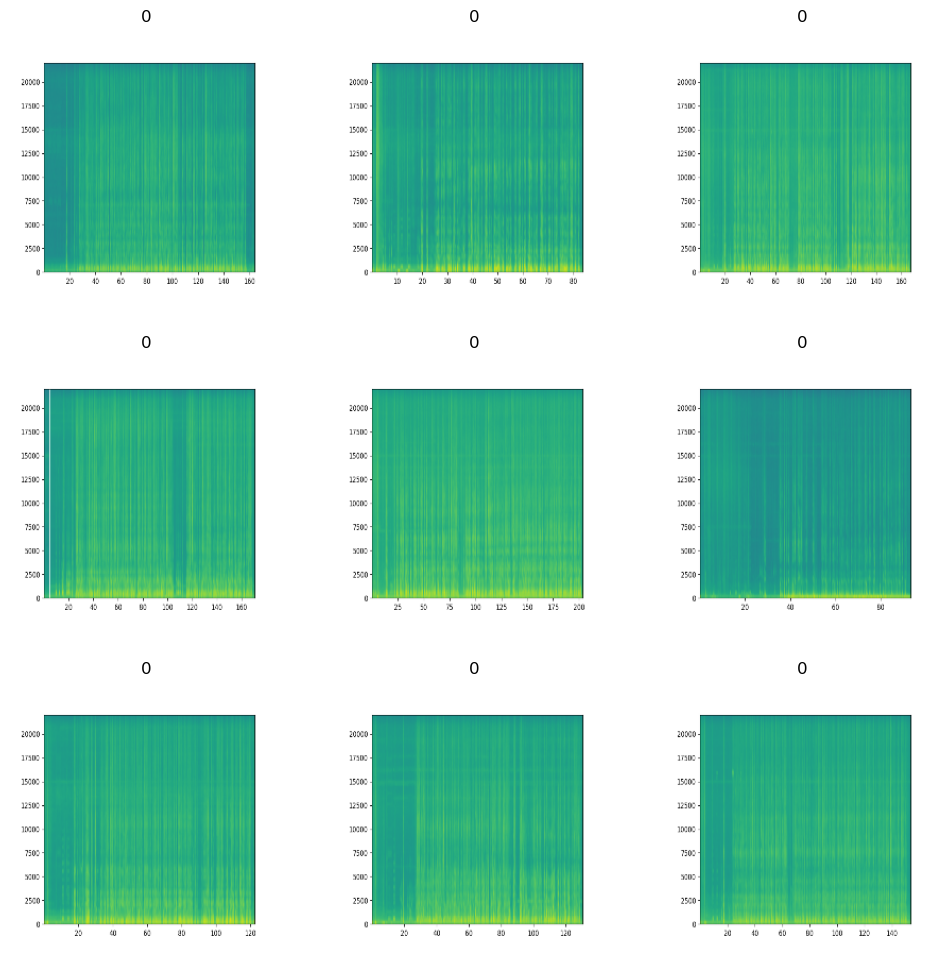

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()


In [9]:
# Function to prepare our datasets for modeling
def prepare(ds, augment=False):
    # Define our rescale transformation
    rescale = tf.keras.Sequential([tf.keras.layers.Rescaling(1./255)])
    
    # Define flip and rotate transformations for augmentation
    flip_and_rotate = tf.keras.Sequential([
        tf.keras.layers.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.RandomRotation(0.2)
    ])
    
    # Apply rescale to both datasets and augmentation only to training if specified
    ds = ds.map(lambda x, y: (rescale(x, training=True), y))
    if augment:
        ds = ds.map(lambda x, y: (flip_and_rotate(x, training=True), y))
    return ds

# Prepare the training and validation datasets
train_dataset = prepare(train_dataset, augment=False)
valid_dataset = prepare(valid_dataset, augment=False)




In [10]:
# Create CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))
model.add(tf.keras.layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy'],
)

# Train model for 10 epochs, capture the history
history = model.fit(train_dataset, epochs=100, validation_data=valid_dataset)

Epoch 1/100
1/1 [==============================] - 16s 16s/step - loss: 3.4242 - accuracy: 0.0625 - val_loss: 2.5251 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 8s 8s/step - loss: 3.2262 - accuracy: 0.0625 - val_loss: 1.9606 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 8s 8s/step - loss: 2.9119 - accuracy: 0.0938 - val_loss: 1.4916 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 8s 8s/step - loss: 2.3205 - accuracy: 0.2500 - val_loss: 1.3743 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 8s 8s/step - loss: 2.7691 - accuracy: 0.1562 - val_loss: 1.1199 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 8s 8s/step - loss: 2.8990 - accuracy: 0.0938 - val_loss: 0.9508 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 8s 8s/step - loss: 2.5537 - accuracy: 0.1250 - val_loss: 0.8472 - val_accuracy: 1.0000
Epoch 8/100
1/1 [=======

Epoch 60/100
1/1 [==============================] - 8s 8s/step - loss: 0.8067 - accuracy: 0.9375 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 61/100
1/1 [==============================] - 8s 8s/step - loss: 0.8124 - accuracy: 0.9375 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 62/100
1/1 [==============================] - 8s 8s/step - loss: 0.8480 - accuracy: 0.8750 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 63/100
1/1 [==============================] - 8s 8s/step - loss: 0.8621 - accuracy: 0.8750 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 64/100
1/1 [==============================] - 8s 8s/step - loss: 0.7696 - accuracy: 0.9375 - val_loss: 9.6067e-04 - val_accuracy: 1.0000
Epoch 65/100
1/1 [==============================] - 8s 8s/step - loss: 0.9382 - accuracy: 0.8438 - val_loss: 9.3871e-04 - val_accuracy: 1.0000
Epoch 66/100
1/1 [==============================] - 8s 8s/step - loss: 0.6590 - accuracy: 0.9375 - val_loss: 7.6115e-04 - val_accuracy: 1.0000
Epoch 67/100
1/

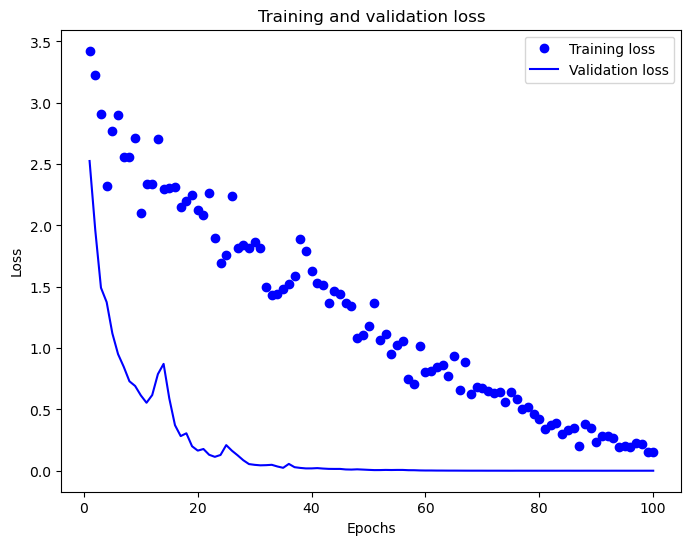

In [11]:
# Plot the loss curves for training and validation.
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

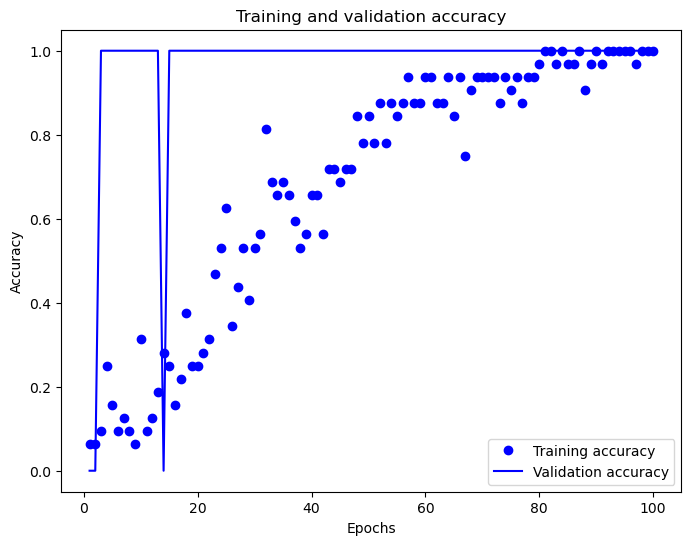

In [12]:
# Plot the accuracy curves for training and validation.
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
# Load or prepare the test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    directory=OUTPUT_DIR,
    shuffle=True,
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    subset="validation",
    seed=0
)

# Prepare the test dataset
test_dataset = prepare(test_dataset, augment=False)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy}")




Found 39 files belonging to 2 classes.
Using 7 files for validation.
1/1 [==============================] - 1s 867ms/step - loss: 1.1132e-04 - accuracy: 1.0000
Test accuracy: 1.0


In [21]:
# Compute the final loss and accuracy
final_loss, final_acc = model.evaluate(valid_dataset, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.000111, final accuracy: 1.000000


In [22]:
# Save the model
model.save("voice_model.h5")

print("Model saved successfully!")

C:\Users\mahmoud\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully!
